In [1]:
#import libraries
import numpy as np
from pandas import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jrchen/flatiron-ds-course/Milestones/capstone/cleaningData/clean_basic.csv')

In [3]:
df.head()

,anime_id,title,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,imageLink,genre,type,episodes,rating,members
0,2928,.hack//G.U. Returner,NaN,False,2007.0,2007.0,NaN,"""There is something I wish to entrust to you; ...",[],[],4353.0,60,2877,45,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
1,3269,.hack//G.U. Trilogy,93.0,False,2008.0,2008.0,NaN,The World is an ordinary online game – or at l...,['CyberConnect2 sai'],[],5684.0,86,3440,64,https://www.anime-planet.com//images/anime/cov...,"Action, Fantasy, Game, Sci-Fi",Movie,1,7.32,22537
2,9332,.hack//Quantum,NaN,False,2010.0,2011.0,NaN,"Tobias, Mary, and Sakuya are way into the The ...",['Kinema Citrus'],[],4751.0,218,2489,64,https://www.anime-planet.com//images/anime/cov...,"Action, Adventure, Fantasy, Game, Sci-Fi",OVA,3,7.36,26163
3,873,.hack//Roots,24.0,False,2006.0,2006.0,Spring,Years after the fantasy MMORPG known as 'The W...,['BEE TRAIN'],[],10615.0,572,4250,716,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Sci-Fi",TV,26,7.06,50480
4,15219,.hack//Versus: The Thanatos Report,21.0,False,2012.0,2012.0,NaN,NaN,[],[],695.0,20,622,10,https://www.anime-planet.com//inc/img/blank_ma...,"Action, Game, Sci-Fi",Special,1,6.51,4474


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      4316 non-null   int64  
 1   title         4316 non-null   object 
 2   duration      2521 non-null   float64
 3   ongoing       4316 non-null   bool   
 4   startYr       4311 non-null   float64
 5   finishYr      4289 non-null   float64
 6   sznOfRelease  1284 non-null   object 
 7   description   2643 non-null   object 
 8   studios       4316 non-null   object 
 9   contentWarn   4316 non-null   object 
 10  watched       4294 non-null   float64
 11  watching      4316 non-null   int64  
 12  wantWatch     4316 non-null   int64  
 13  dropped       4316 non-null   int64  
 14  imageLink     4316 non-null   object 
 15  genre         4316 non-null   object 
 16  type          4316 non-null   object 
 17  episodes      4316 non-null   object 
 18  rating        4316 non-null 

In [5]:
genre_list=[] 
for i in df['genre']:
    for n in i.split(','):
        if n.strip() not in genre_list:
            genre_list.append(n.strip())
genre_list.sort()

In [6]:
genre_dict = {}
for i in genre_list:
    genre_dict[i] = 0

In [7]:
for i in df['genre']:
    for n in i.split(','):
        for m in genre_dict.keys():
            if n.strip() == m:
                genre_dict[m] += 1

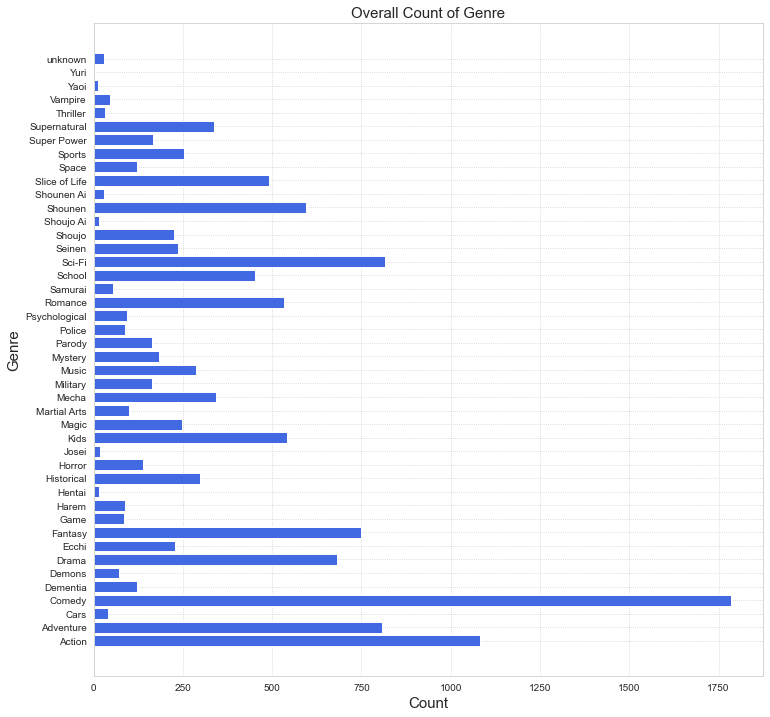

In [8]:
plt.figure(figsize=(12,12))
plt.barh(list(genre_dict.keys()), list(genre_dict.values()), color='royalblue')
plt.title('Overall Count of Genre', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.grid(ls='dotted')
plt.savefig('/Users/jrchen/flatiron-ds-course/Milestones/capstone/python/static/cat_genre.png'.format(i))

In [9]:
continuous=['duration', 'watched', 'startYr', 'finishYr','watching', 
            'wantWatch', 'dropped', 'rating', 'members']
cat = ['ongoing', 'sznOfRelease',  'type']

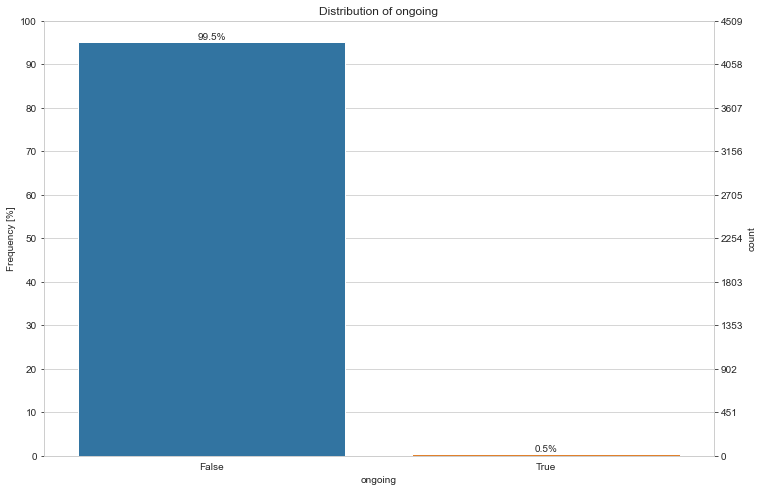

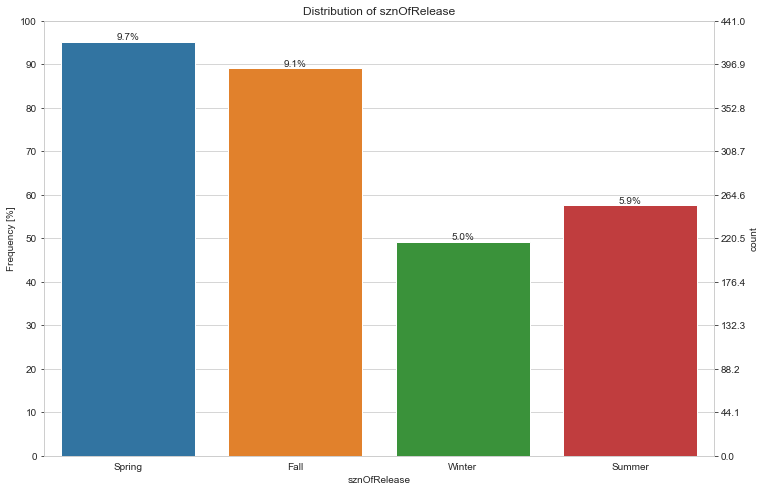

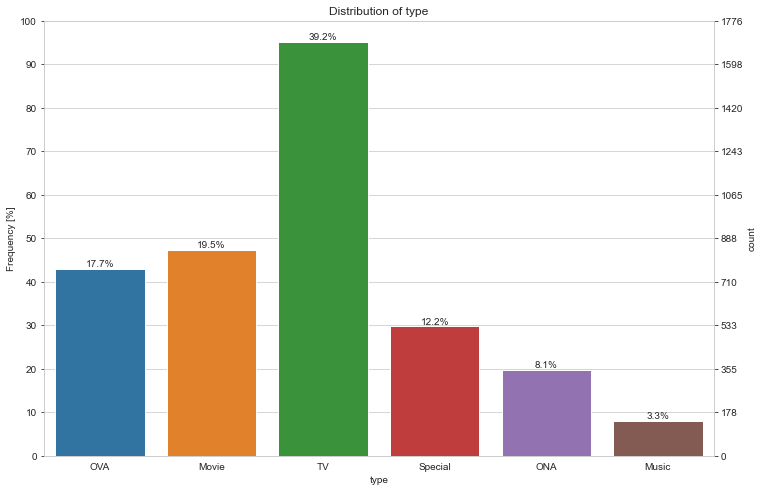

In [10]:
for i in cat:
    ncount = len(df)

    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=i, data=df)
    plt.title('Distribution of {}'.format(i))
    plt.xlabel(i)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    #ax.set_ylim(0,ncount)

    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.savefig('/Users/jrchen/flatiron-ds-course/Milestones/capstone/python/static/cat_{}.png'.format(i))


In [11]:
# Make an example
anime = df.loc[df['anime_id']==2928]
anime

,anime_id,title,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,contentWarn,watched,watching,wantWatch,dropped,imageLink,genre,type,episodes,rating,members
0,2928,.hack//G.U. Returner,NaN,False,2007.0,2007.0,NaN,"""There is something I wish to entrust to you; ...",[],[],4353.0,60,2877,45,https://www.anime-planet.com//images/anime/cov...,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412


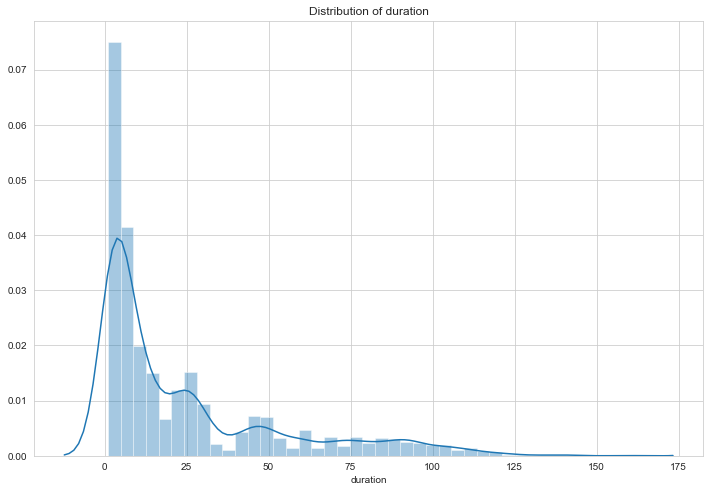

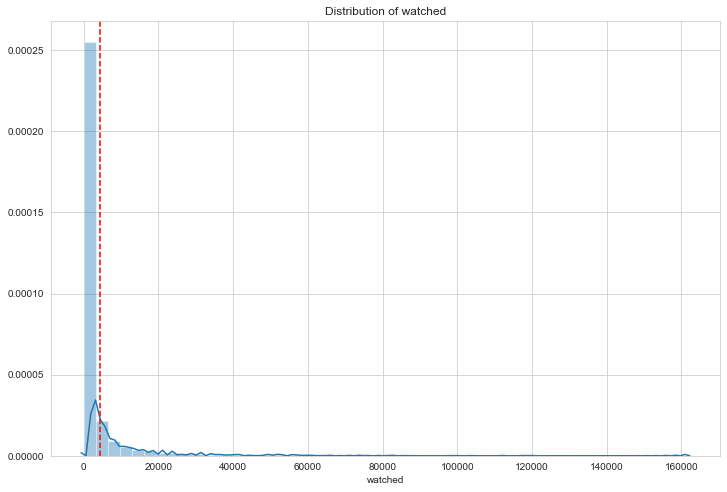

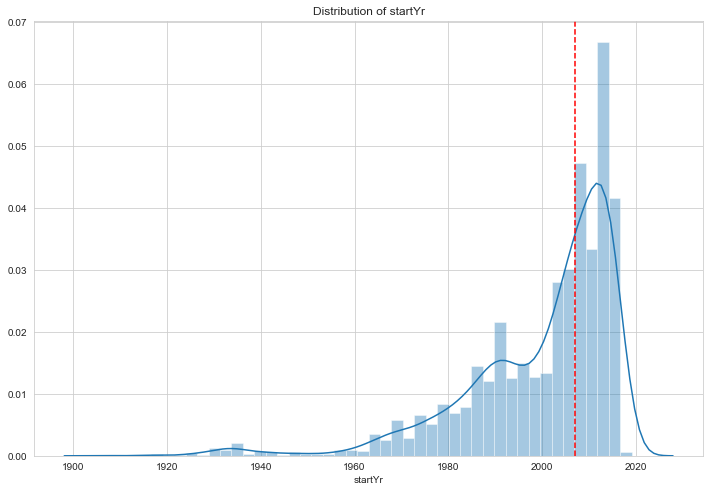

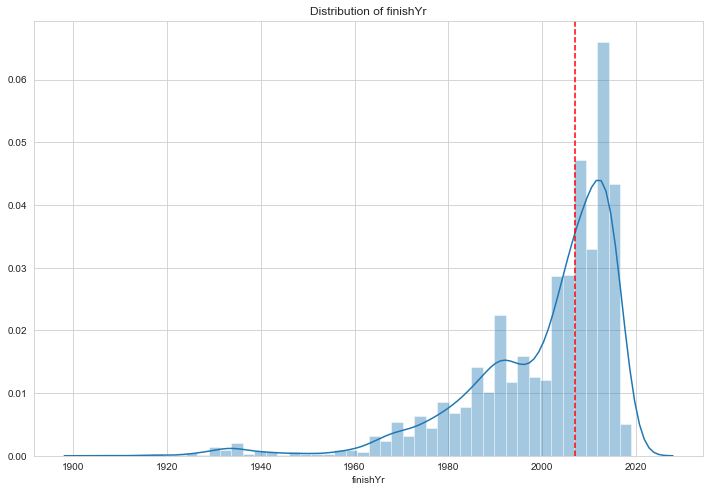

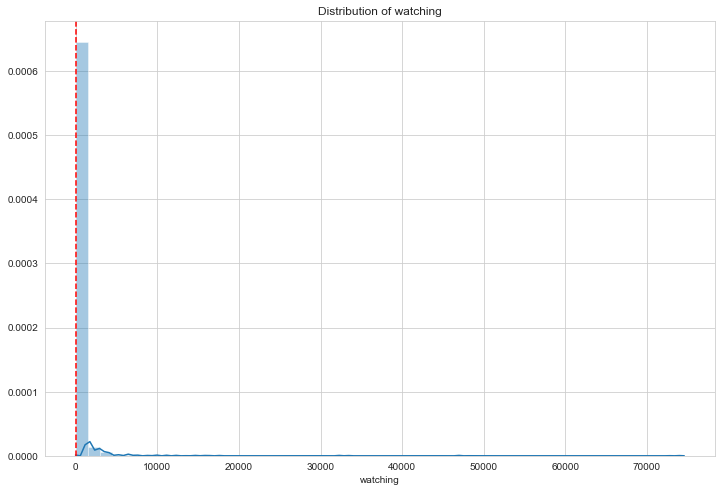

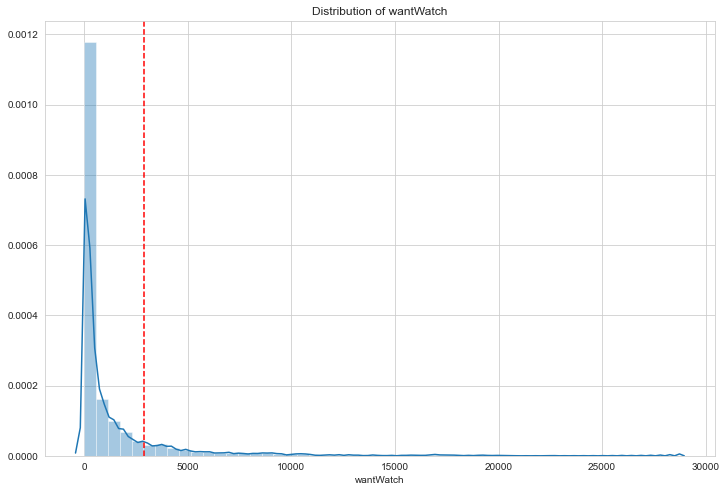

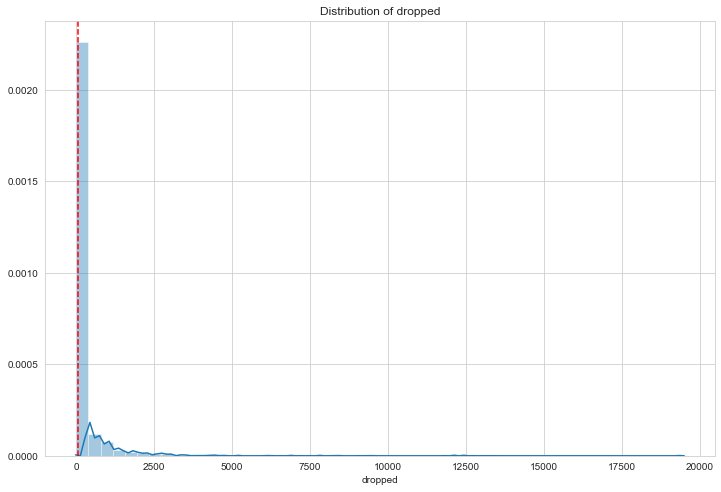

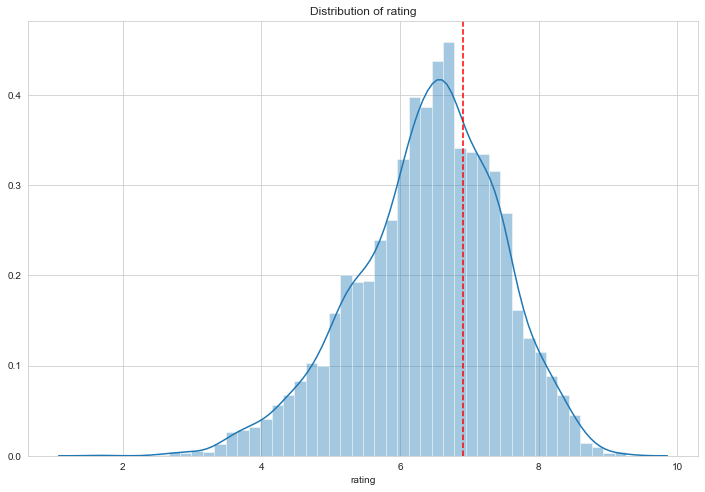

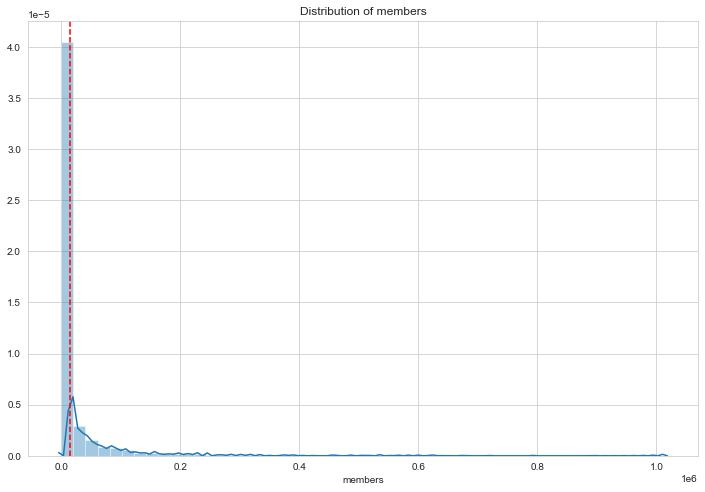

In [12]:
for i in continuous:
    plt.figure(figsize=(12,8))
    sns.distplot(df[i])
    plt.title('Distribution of {}'.format(i))
    try:
        plt.axvline(anime[i].values[0], ls='--', c='red')
    except:
        print('no data here')
    plt.savefig('/Users/jrchen/flatiron-ds-course/Milestones/capstone/python/static/dist_{}.png'.format(i))

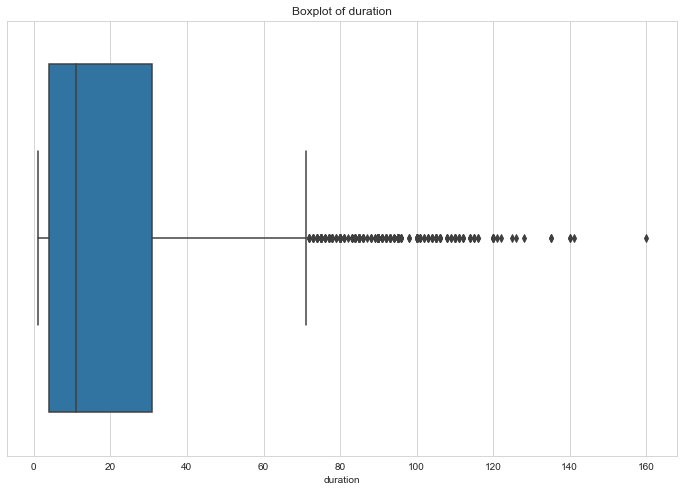

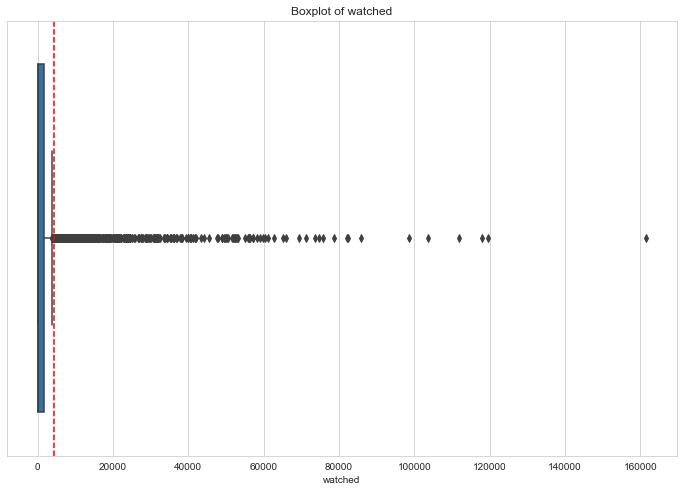

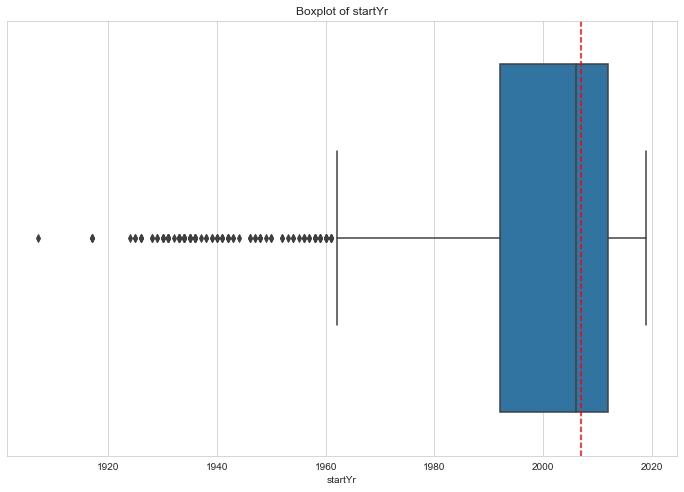

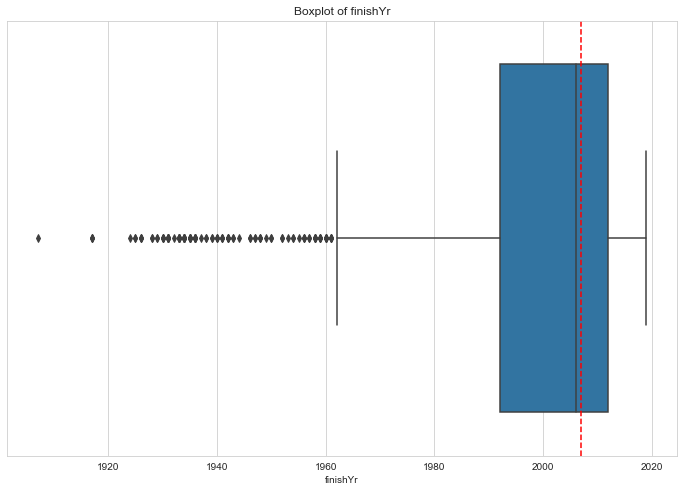

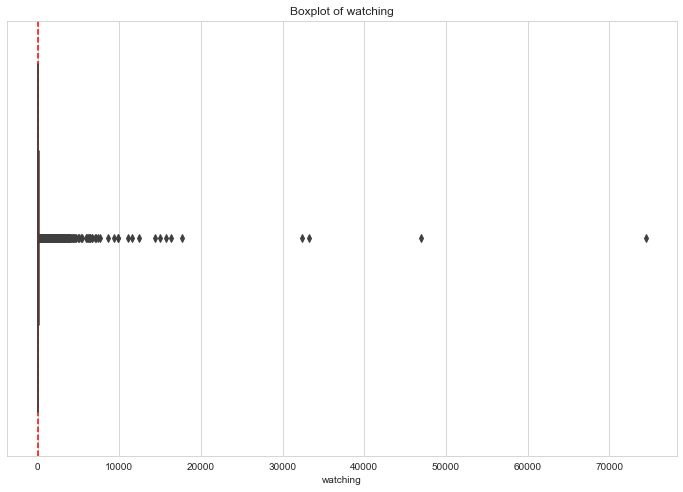

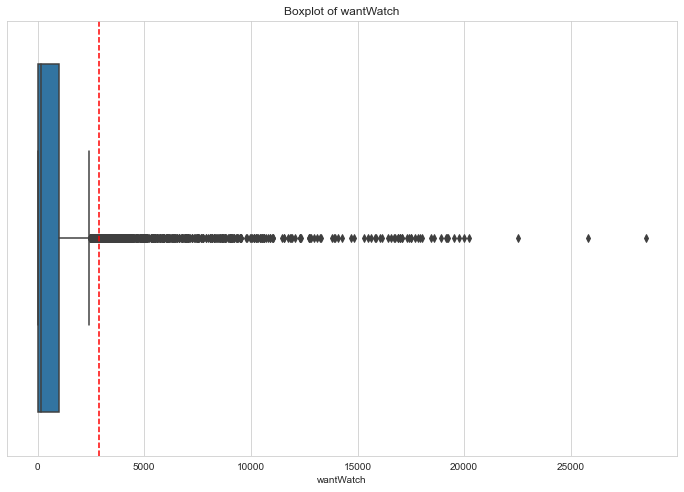

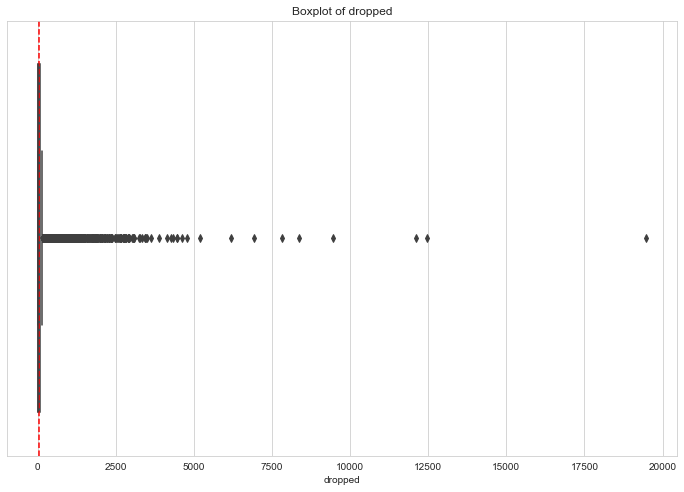

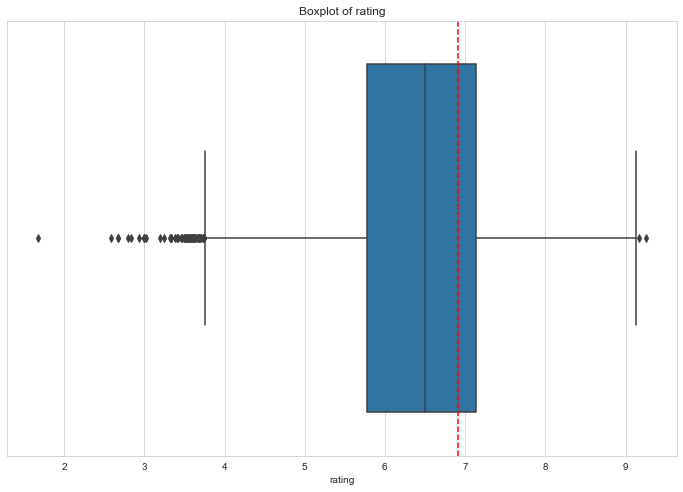

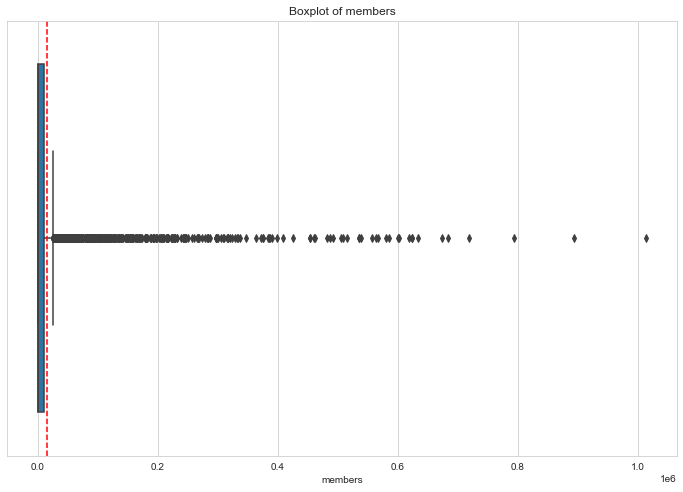

In [13]:
for i in continuous:
    plt.figure(figsize=(12,8))
    sns.boxplot(df[i])
    plt.title('Boxplot of {}'.format(i))
    try:
        plt.axvline(anime[i].values[0], ls='--', c='red')
    except:
        print('no data here')
    plt.savefig('/Users/jrchen/flatiron-ds-course/Milestones/capstone/python/static/dist_{}.png'.format(i))